<a href="https://colab.research.google.com/github/VeraaaaWei/data_analytics/blob/Python/1.20Copy_of_Unit_4_Logistic_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Dataset Analysis

From Kaggle: The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Tasks:



1.   Every step must have an explanation
2.   Every plot/ chart must have an iterpretation
3.   Add your observations for each section
4.   Draw clear conclusions (at least 5 conclusions)



#Dataset Description

*  survival - Survival (0 = No; 1 = Yes)
*  class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
*  name - Name
*  sex - Sex
*  age - Age
*  sibsp - Number of Siblings/Spouses Aboard
*  parch - Number of Parents/Children Aboard
*  ticket - Ticket Number
*  fare - Passenger Fare
*  cabin - Cabin
*  embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
*  boat - Lifeboat (if survived)
*  body - Body number (if did not survive and body was recovered)





#1. Data Acquisition & Analysis

In [122]:
import pandas as pd

In [123]:
train = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/titanic_train.csv')

Review the top and bottom part of the dataset

In [124]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# EDA (Exploratory Data Analysis)

In [126]:
import seaborn as sns

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt

Create a heatmap of missing data in seaborn

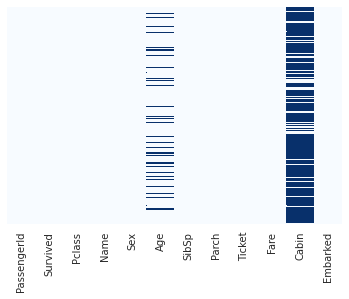

In [128]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap = 'Blues')

In [129]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Observations

Age-about 20% of the data is missing 

Cabin-missing so much data to be useful





## Class


Plot a CountPlot with the Survived datapoint and set the plot style to whitegrid

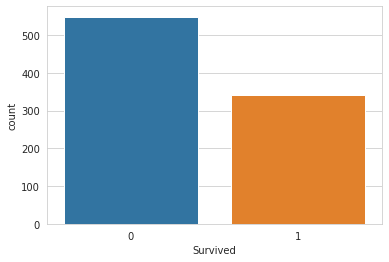

In [130]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived', data=train)


## Survived

Seperate the data in the above plot by sex.

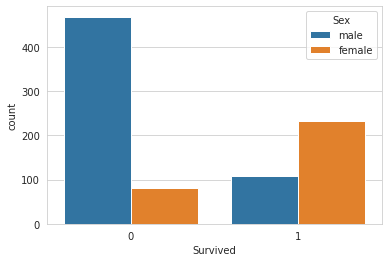

In [131]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived', data=train, hue = 'Sex')

Seperate the survived plot by PClass

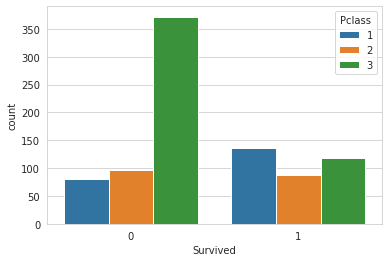

In [132]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived', data=train, hue = 'Pclass')

## Age

Create a Distribution Plot for Age and remove the missing age values with 30 bins.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


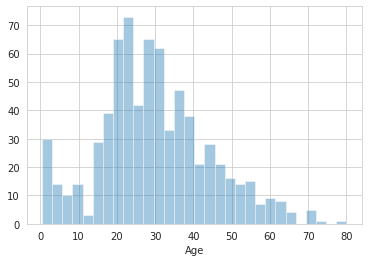

In [133]:
sns.distplot(train['Age'].dropna(), kde=False, bins= 30)

## Siblings

Create a count plot for Siblings

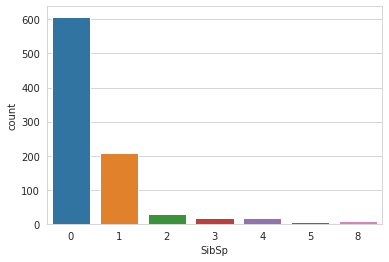

In [135]:
sns.countplot( x= 'SibSp',data=train)

# 2. Data Cleaning and Data Pre - Processing

For our logistic model to work 
*   we need to convert all non-numeric variables to numeric
*   drop columns that are not needed 



Drop the Cabin column from the train dataset but do not print the data

In [137]:
train.drop('Cabin', axis=1, inplace=True)

Remove all Null/NaN value from the dataset and do not print the dataset

In [138]:
train.dropna(inplace=True)

For our logistic model to work, we need to convert all non-numeric variables to numeric and drop columns that we do not need.

In [139]:
sex= pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

Drop Sex, Embarked, Name, Ticket columns from the dataset

In [140]:
train.drop(['Sex', 'Embarked','Name','Ticket'],axis=1, inplace=True)

Review the top and bottom part of the dataset

In [141]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


using pandas concatenate Train, Sex and Embark in your train dataset

In [142]:
train= pd.concat([train,sex,embark],axis = 1)

In [143]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# 3. Model building

Splitting the train dataset into Train and Test

In [144]:
from sklearn.model_selection import train_test_split

In [154]:
 X_train, X_test,y_train, y_test =train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.3,random_state=0)

Create the Logistic Regression data model

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
logmodel = LogisticRegression()

In [157]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Evaluate the Training Model

In [169]:
y_test_predict = logmodel.predict(X_test)

## Classification report

In [159]:
from sklearn.metrics import classification_report

print the Classification Report

In [161]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       125
           1       0.75      0.66      0.70        89

    accuracy                           0.77       214
   macro avg       0.76      0.75      0.76       214
weighted avg       0.76      0.77      0.76       214



## Confusion Matrix

Print a confusion Matrix for y_test and y_predict

In [162]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_test_predict))


[[105  20]
 [ 30  59]]


ANO = 125 PNO = 135
AYES= 89  PYES = 79

Plot heatmap for Confusion Matrix with y_test and y_test_predict

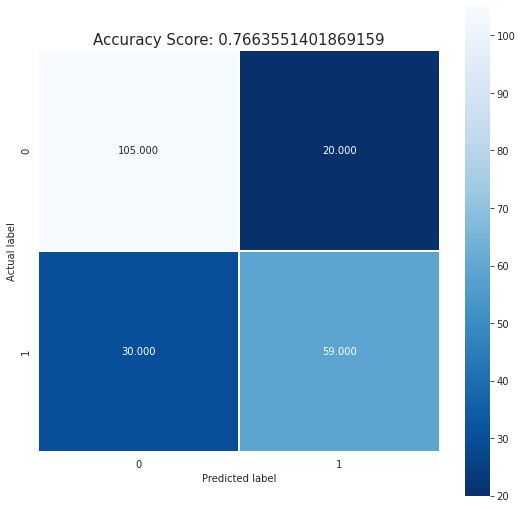

In [172]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt=".3f",linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(X_test, y_test))
plt.title(all_sample_title, size = 15);


#Observations
1.Accuracy- How often is the classifier correct?0.77

2.Error Rate- How often is it wrong? (20+30)/214 = 0.23

3.Sensitivity/Recall-predict yes as yes 60/83 = 0.66

4.False Positive - say yes to no 20/125=0.16

5.Specificity -predict no as no 105/128 = 0.84










#ROC Curve
*  Shows the tradeoff between Sensitivity and Specificity
* Sensitivity:TPR,  Specificity: 1-FPR


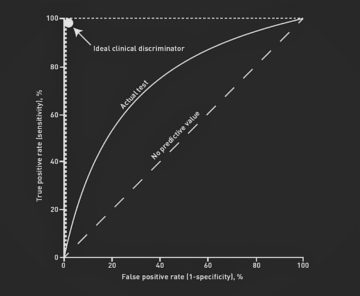



**Plot the ROC Curve**

In [173]:
from sklearn import metrics

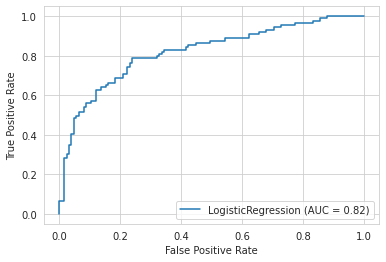

In [174]:
 metrics.plot_roc_curve(logmodel, X_test, y_test)

**Observation**
1. TPR -The true positive rate is the proportion of observations that were correctly predicted to be positive out of all positive observations (TP/(TP + FN))
2. FPR -  proportion of observations that are incorrectly predicted to be positive out of all negative observations (FP/(TN + FP)).










# Conclusion...

What does the AUC value mean?